# Importing some required libraries

In [3]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Data-Preprocessing

In [5]:
df = pd.read_csv("diabetes2.csv")

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**as we can see the data needs to be normalized as the values of glucose and diabetesPedigreeFunction are very extreme the glucose value will effect the output and diabetes pedigree fucntion will be shadowed under that effect so data needs to noramlized and everything shd be brought to the same unit

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Train and test split and normalizing the data

In [11]:
independent = df.drop(columns='Outcome',axis=1)
dependent = df['Outcome']

In [12]:
independent.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
dependent

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
scaler = StandardScaler()
scaler.fit(independent)
standard_inde = scaler.transform(independent)

In [16]:
standard_inde

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
X = standard_inde
Y = dependent

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=0.2,stratify=Y)


### implementing the model

In [83]:
model = svm.SVC(kernel='linear')

In [84]:
model.fit(X_train,y_train)

SVC(kernel='linear')

### calculating the accuracy

In [85]:
train_prediction = model.predict(X_train)

In [86]:
train_prediction_accuracy = accuracy_score(y_train,train_prediction)

In [87]:
test_prediction = model.predict(X_test)

In [88]:
test_prediction_accuracy = accuracy_score(y_test,test_prediction)

In [89]:
print(test_prediction_accuracy," ",train_prediction_accuracy)

0.7727272727272727   0.7866449511400652


# just wanted to see how to split of training and test data improves accuracy

In [79]:
test=[]
train=[]
i=0.10
while(i<0.9):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=i,stratify=Y)
    model = svm.SVC(kernel='linear')
    model.fit(X_train,y_train)
    train_prediction = model.predict(X_train)
    train_prediction_accuracy = accuracy_score(y_train,train_prediction)
    test_prediction = model.predict(X_test)
    test_prediction_accuracy = accuracy_score(y_test,test_prediction)
    train.append(train_prediction_accuracy)
    test.append(test_prediction_accuracy)
    i+=0.10
print(train)
print(test)
    

[0.784370477568741, 0.7866449511400652, 0.7821229050279329, 0.7717391304347826, 0.7734375, 0.7719869706840391, 0.7608695652173914, 0.7843137254901961, 0.7763157894736842]
[0.7792207792207793, 0.7727272727272727, 0.7748917748917749, 0.775974025974026, 0.7708333333333334, 0.7613882863340564, 0.7565055762081785, 0.7495934959349594, 0.7398843930635838]


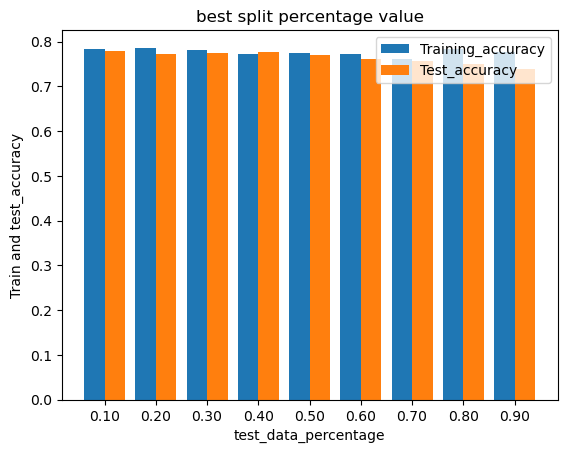

In [81]:
X1 = ['0.10','0.20','0.30','0.40','0.50','0.60','0.70','0.80','0.90']
X_axis = np.arange(len(X1))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'Training_accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test_accuracy')
  
plt.xticks(X_axis, X1)
plt.xlabel("test_data_percentage")
plt.ylabel("Train and test_accuracy")
plt.title("best split percentage value")
plt.legend()
plt.show()

#### there is a very small difference in accuracy as i thought from 0.50 the model undefits as there is no enough training data and the accuracy will be very less but it is not

## lets make a predicition

In [91]:
input_data = (5,166,72,19,175,25.8,0.587,51)
array = np.asarray(input_data)
array_reshape = array.reshape(1,-1)
std = scaler.transform(array_reshape)
y_pred = model.predict(std)
if y_pred ==1:
    print("person has diabetes")
else:
    print("person doesnot have diabetes")

person has diabetes


C:\Users\Srimanth\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
